Use this IPython notebook on [Google Colaboratory](https://colab.research.google.com) to run Mask R-CNN object detection with image segmentation.

> Mask R-CNN for object detection and instance segmentation on Keras and TensorFlow

> https://github.com/matterport/Mask_RCNN/

Make sure you enable GPU in Colaboratory using menu path Runtime -> Change runtime type

Join our efforts in [Open Source Self Driving Car Initiative](http://OSSDC.org)!

In [0]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import sys
# for timing
import time



In [0]:
# https://keras.io/
!pip install -U -q keras && pip install -U -q imgaug
import keras

In [0]:
# pre-trained COCO weights
# https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!rm mask_rcnn_balloon.h5
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/mask_rcnn_balloon.h5
!ls

In [0]:
# Archieved source code
# https://github.com/matterport/Mask_RCNN/archive/v2.0.zip

# just in case
!rm -rf Mask_RCNN-2.0
!rm -rf Mask_RCNN-2.1
!rm -rf Mask_RCNN
!rm -rf utils

#!wget https://github.com/matterport/Mask_RCNN/archive/v2.0.zip
#!wget https://github.com/matterport/Mask_RCNN/archive/v2.1.zip
#!unzip v2.1.zip

!git clone https://github.com/matterport/Mask_RCNN
  
sys.path.append('.')

#!cp -r Mask_RCNN-2.1/* .
!cp -r Mask_RCNN/* .

# clean up
#!rm -rf Mask_RCNN-2.0
#!rm v2.0.zip

!ls


In [0]:
!rm -rf coco
#!rm coco.py
# required by coco
!pip install Cython

# install pycoctools
!git clone https://github.com/waleedka/coco.git
!cd coco/PythonAPI/ && make install
!cd ../../



In [5]:
print(os.getcwd())

from samples.coco import coco
from mrcnn import utils
from mrcnn import model as modellib
from mrcnn import visualize

/content


Using TensorFlow backend.


In [0]:
%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [0]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

In [0]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [0]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [0]:
!rm common.py
!wget https://raw.githubusercontent.com/OSSDC/OSSDC-VisionBasedACC/master/object_detection/common.py
precision = 10
from datetime import datetime

def getCurrentClock():
    #return time.clock()
    return datetime.now()

# start timer here
#start_time = getCurrentClock()
import time

start_time = time.time()

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python && pip install -q -U youtube-dl && pip install -q -U pafy

In [0]:
import time, pafy

start_time = time.time()

#A smooth drive in The Crew on PS4 - OSSDC Simulator ACC Train 30fps
url = 'https://www.youtube.com/watch?v=uuQlMCMT71I'

#Bad weather sample, uncomment this line to see how the detection works on bad weather
#url = "https://www.youtube.com/watch?v=q3q26xrigX4"

#url= ... #put your Youtube video URL here and uncomment the line, to test on a different video

def getVideoURL(url):
    videoUrl = url
    video = pafy.new(url)
    streams = video.streams
    videoUrlList={}
    for s in streams:
        videoUrlList[s.resolution] = s.url
        #print(s.resolution, s.extension, s.get_filesize(), s.url)

    if videoUrlList.get("1280x720",None) is not None:
        videoUrl = videoUrlList.get("1280x720",None)
        print("1280x720")

    if videoUrlList.get("1920x1080",None) is not None:
        videoUrl = videoUrlList.get("1920x1080",None)
        print("1920x1080")
    return videoUrl

origVideoUrl = url

if "youtube." in url: 
    videoUrl = getVideoURL(url)
    !wget -q -O video-test.mp4 '$videoUrl' #streaming directly doesn't work in Colaboratory yet, need to save the file on disk first
else:
    videoUrl = url

print("videoUrl =",videoUrl)
videoUrl='video-test.mp4'

Processing 1 images
image                    shape: (448, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


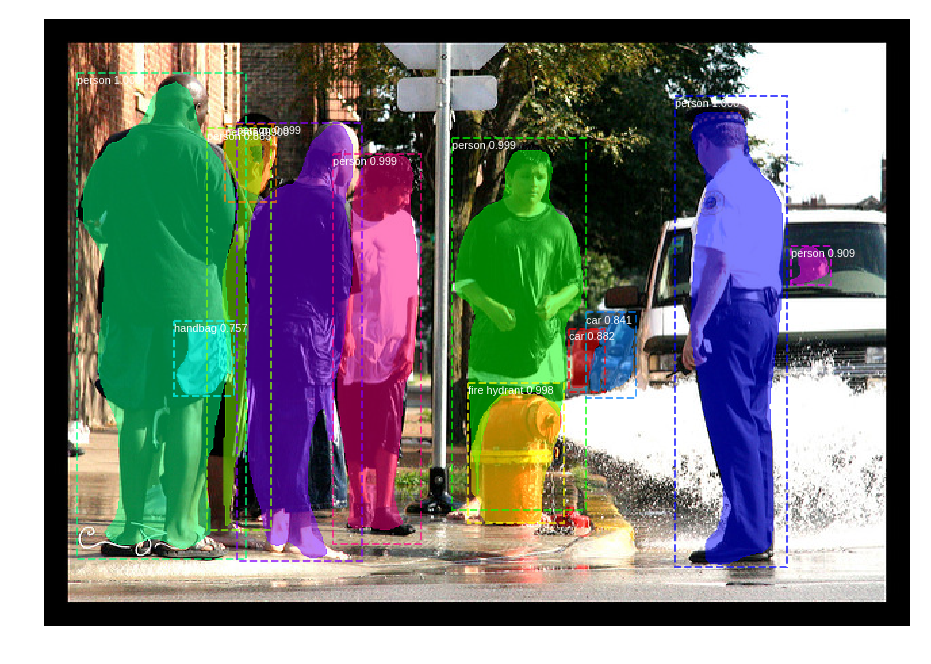

In [0]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

#nowMicro = getCurrentClock()
#print("# %0.4f seconds ---" % (nowMicro - start_time).total_seconds())


In [0]:
import sys
sys.path.append('.')

import cv2

def draw_str(dst, target, s):
    x, y = target
    cv2.putText(dst, s, (x+1, y+1), cv2.FONT_HERSHEY_PLAIN, 1.0, (0, 0, 0), thickness = 2, lineType=cv2.LINE_AA)
    cv2.putText(dst, s, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.0, (255, 255, 255), lineType=cv2.LINE_AA)

#%pylab inline 
from IPython.display import clear_output

cap = cv2.VideoCapture('video-test.mp4')   # /dev/video0

showImage=False
showImage=True

from datetime import datetime

def getCurrentClock():
    #return time.clock()
    return datetime.now()
streamImage=False
#streamImage=True

fpsValue=0
tracks=[]
frameCnt=0
prevFrameCnt=0
prevTime = time.time()

import socket
if streamImage:
  print (your_target_ip,your_target_port)
  #on server run this command:
  #ffplay -f mjpeg tcp://0.0.0.0:45654?listen
  clientsocket=socket.socket(socket.AF_INET,socket.SOCK_STREAM)
  clientsocket.connect((your_target_ip,your_target_port)) #the target ip is where the ffplay is listening

while True:
  ret, image = cap.read()
  if not ret:
    #print("no frame")
    continue

  frameCnt=frameCnt+1
  nowMicro = time.time()
  delta = (nowMicro-prevTime)#.total_seconds()
  #print("%f " % (delta))
  if delta>=1.0:
      fpsValue = ((frameCnt-prevFrameCnt)/delta) 
      #print("FPS = %0.4f" % ((frameCnt-prevFrameCnt)/delta))
      prevTime = nowMicro
      prevFrameCnt=frameCnt
  
  nowMicro = time.time()
  # Run detection
  results = model.detect([image], verbose=1)
  #print("# %s - %s - %0.4f seconds ---" % (frameCnt,rclasses.astype('|S3'), (nowMicro - start_time).total_seconds()))
  draw_str(image, (20, 20), "FPS = %3.2f, %0.4f sec, Track points = %5d, Frame = %6d" % (fpsValue,(nowMicro - start_time)/1000,len(tracks), frameCnt))
  start_time = nowMicro
  
  if streamImage:
    #data = cv2.imencode('.jpg', crop_img)[1].tobytes()
    data = cv2.imencode('.jpg', depth)[1].tobytes()
    clientsocket.send(data)

  if showImage:
    if frameCnt % 2: #increase or decrease this to clear after more or less frames
      # Display the frame until new frame is available
      clear_output(wait=True)
    # Visualize results
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'])      
    show()

  if(frameCnt==1000):
    break
      
      
if streamImage:
  clientsocket.close()  